<a href="https://colab.research.google.com/github/vadkts/vadkts/blob/main/Case_price_on_Houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Lets work on predict price of houses in Ohio**

In [2]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
data = data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [11]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [25]:
data['PoolArea'].value_counts(dropna = False) #checking how many NaN's in different axis

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

In [27]:
data = data.drop(['LotFrontage', 'Street', 'Utilities',  '3SsnPorch', 'ScreenPorch', 'LotShape', 'LandContour', 'LotConfig'], axis = 1)

In [30]:
data.drop(['Id'], axis = 1)

,MSSubClass,MSZoning,LotArea,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,61,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,...,298,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,...,0,42,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,0,35,272,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,...,192,84,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,...,0,40,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,...,349,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,...,0,60,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,...,366,0,112,0,0,4,2010,WD,Normal,142125


Посмотрим на распределение цены на наши дома

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-31-3747f4dafb5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});


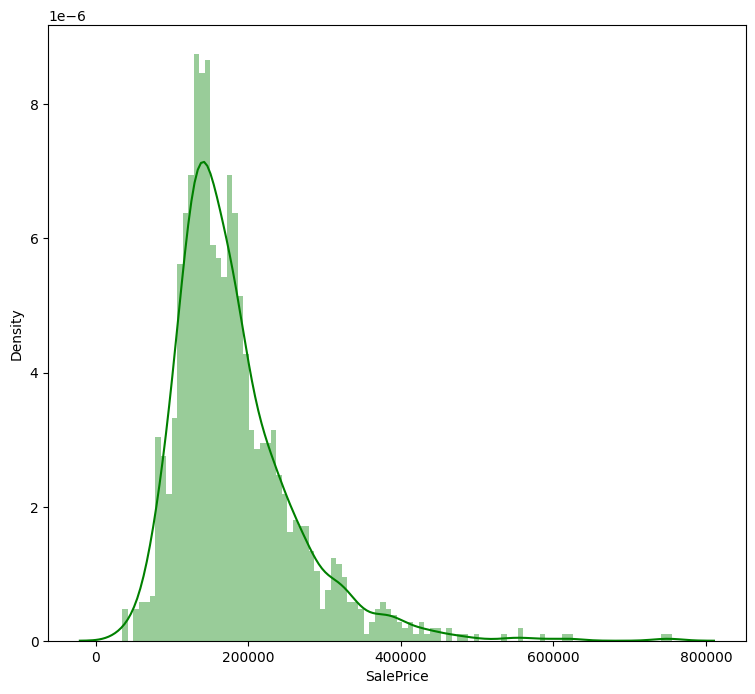

In [31]:
print(data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

Взглянем на только числовые фичи

In [36]:
data_num = data.select_dtypes(include = ['float64', 'int64'])
data_num.drop(['Id'], axis = 1)
data_num.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,2,548,0,61,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,2,460,298,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,2,608,0,42,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,3,642,0,35,272,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,3,836,192,84,0,0,0,12,2008,250000


А также на распределение этих фич:

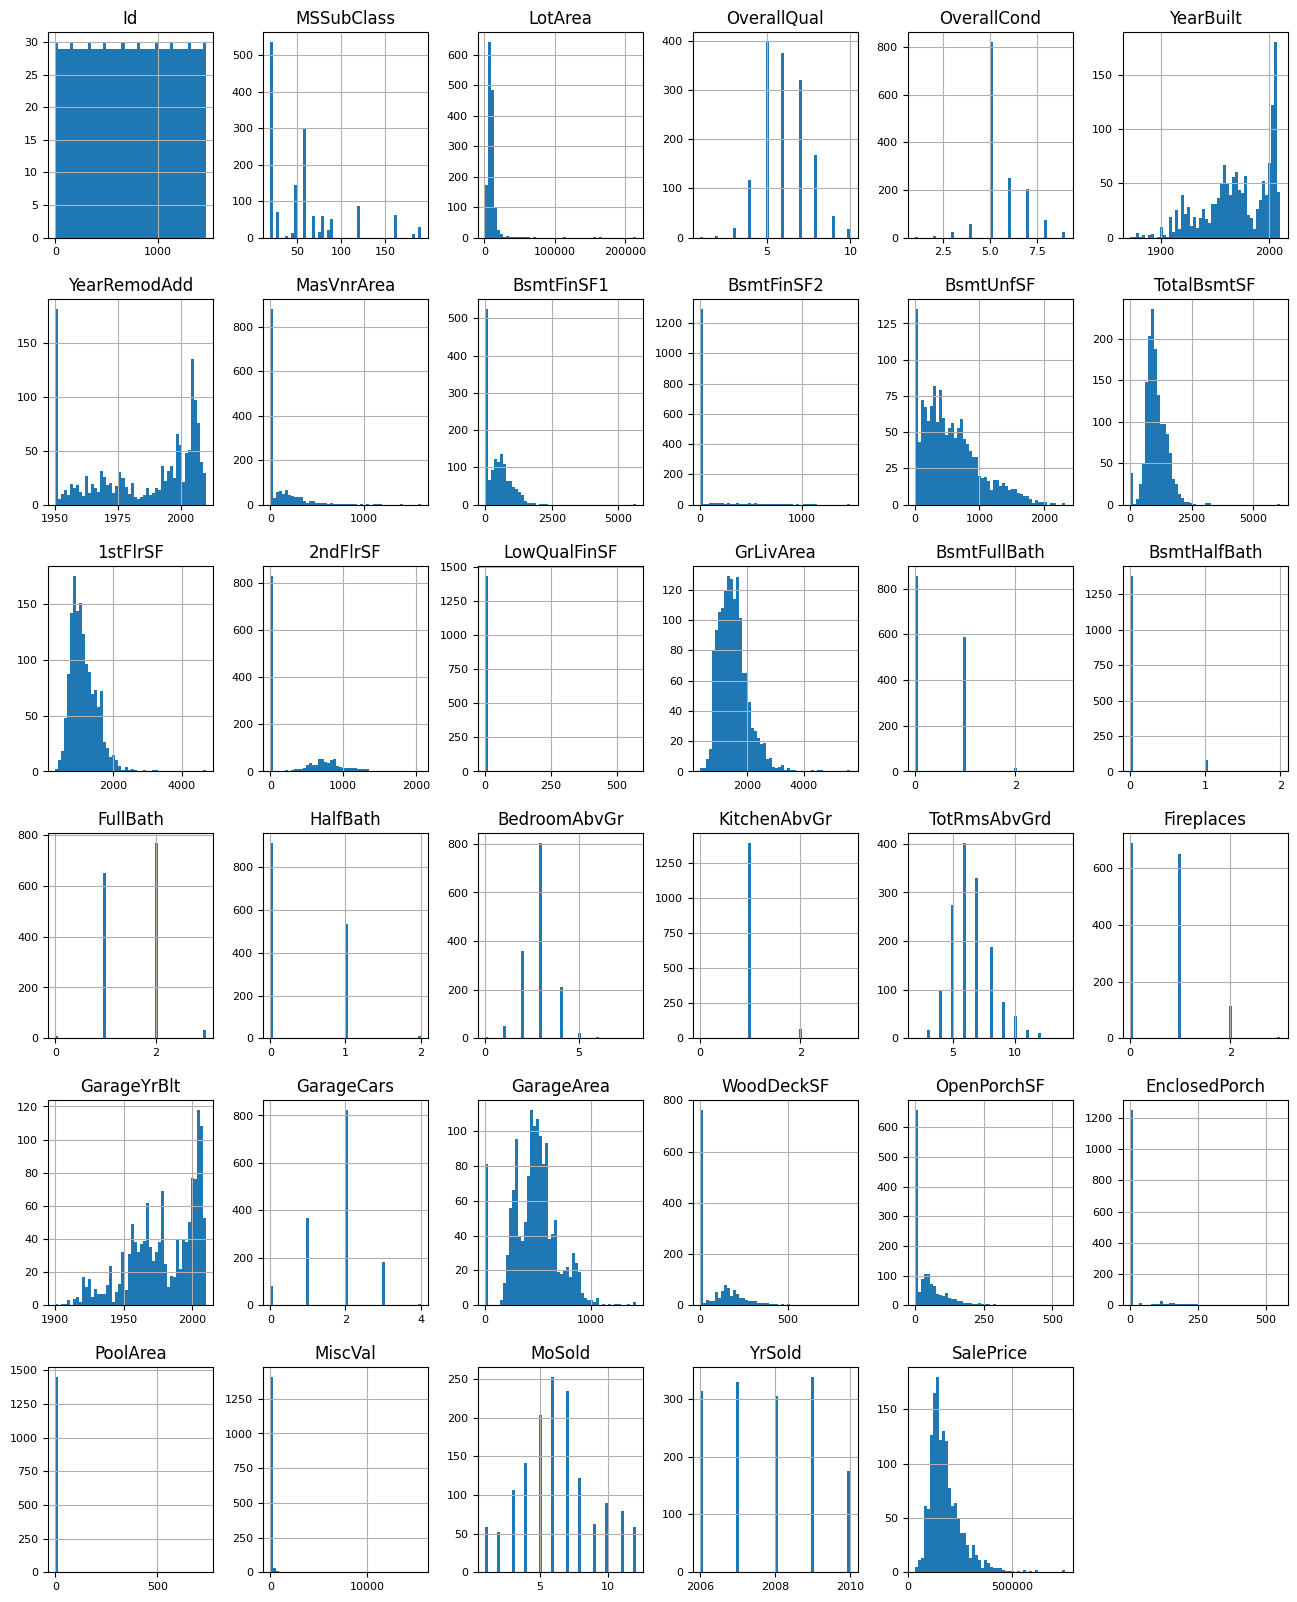

In [37]:
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Теперь можно приступать к обучению модели.
В моём случае я хотел бы воспользоваться RandomForestClassifier из библиотеки scikit-learn.

In [40]:
data = data.drop(['Id'], axis = 1)

In [42]:
from sklearn.model_selection import train_test_split
X = data.drop(['SalePrice'], axis = 1)
y = data['SalePrice']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)